# Importing the Libraries

In [1]:
from scipy.spatial import distance as dist
from IPython.display import display
from PIL import Image

import os
import cv2
import math
import imutils
import numpy as np

In [2]:
out_path = 'ds_output_images'
if not os.path.exists(out_path):
    os.mkdir(out_path)

# Image-1 Edges

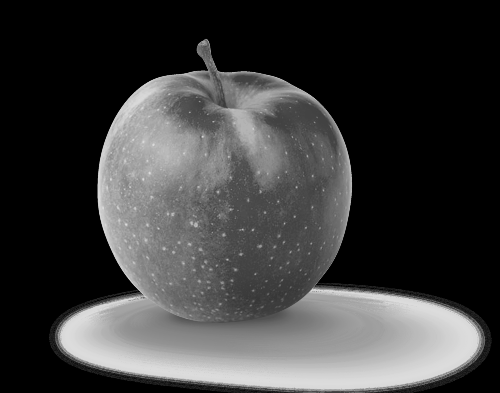

True

In [3]:
image_1 = cv2.imread('apple_1.png')
image_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
gray_1 = cv2.cvtColor(image_1, cv2.COLOR_RGB2GRAY)
gray_1 = cv2.GaussianBlur(gray_1, (5, 5), 0)

display_image = cv2.resize(gray_1, (500, int(500 * gray_1.shape[0] / gray_1.shape[1])))
display(Image.fromarray(display_image))

cv2.imwrite(f'{out_path}/gray1.jpg', display_image)

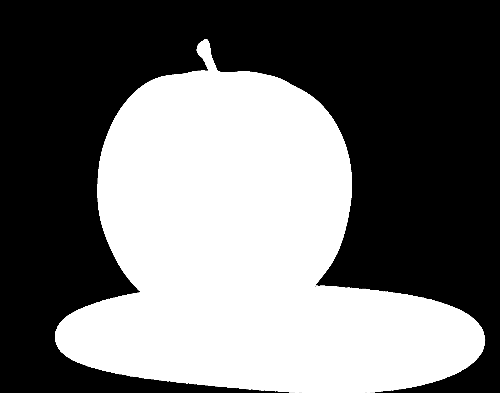

True

In [4]:
# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray_1, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)
# find contours in thresholded image, then grab the largest
# one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c1 = max(cnts, key=cv2.contourArea)

display_image = cv2.resize(thresh, (500, int(500 * thresh.shape[0] / thresh.shape[1])))
display(Image.fromarray(display_image))

cv2.imwrite(f'{out_path}/binary1.jpg', display_image)

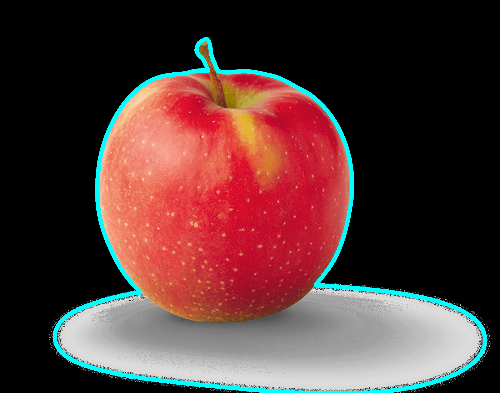

True

In [5]:
con_image = cv2.drawContours(image_1, [c1], -1, (0, 255, 255), 20)

display_image = cv2.resize(con_image, (500, int(500 * con_image.shape[0] / con_image.shape[1])))
display(Image.fromarray(display_image))

cv2.imwrite(f'{out_path}/edge1.jpg', cv2.cvtColor(display_image, cv2.COLOR_BGR2RGB))

# Area of Image-1

In [6]:
area1 = cv2.contourArea(c1)
print(f'Area of the object in Image-1 is {area1} pixels')

Area of the object in Image-1 is 1977434.5 pixels


# Image-2 Edges

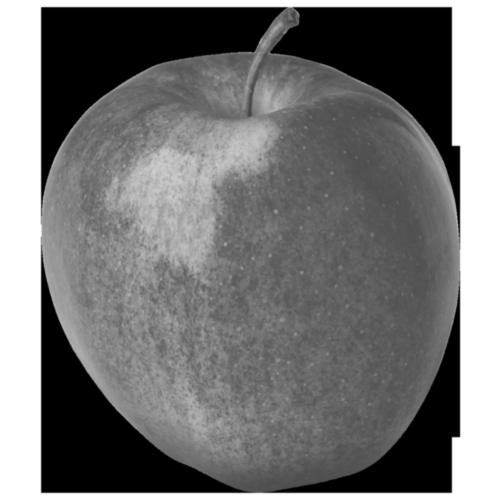

True

In [7]:
image_2 = cv2.imread('apple_2.png')
image_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2RGB)
gray_2 = cv2.cvtColor(image_2, cv2.COLOR_RGB2GRAY)
gray_2 = cv2.GaussianBlur(gray_2, (5, 5), 0)

display_image = cv2.resize(gray_2, (500, int(500 * gray_2.shape[0] / gray_2.shape[1])))
display(Image.fromarray(display_image))

cv2.imwrite(f'{out_path}/gray2.jpg', display_image)

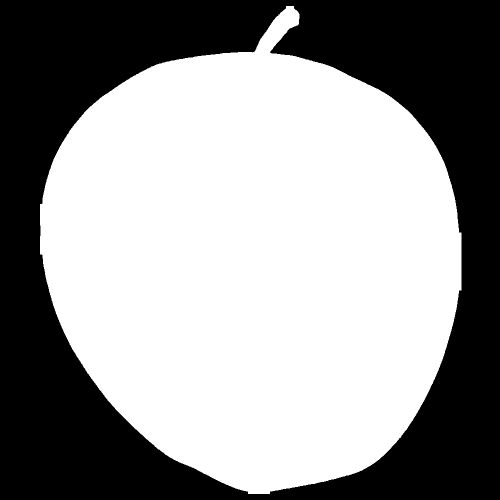

True

In [8]:
gray_2[gray_2 == 255] = 0
# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray_2, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)
# find contours in thresholded image, then grab the largest
# one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c2 = max(cnts, key=cv2.contourArea)

display_image = cv2.resize(thresh, (500, int(500 * thresh.shape[0] / thresh.shape[1])))
display(Image.fromarray(display_image))

cv2.imwrite(f'{out_path}/binary2.jpg', display_image)

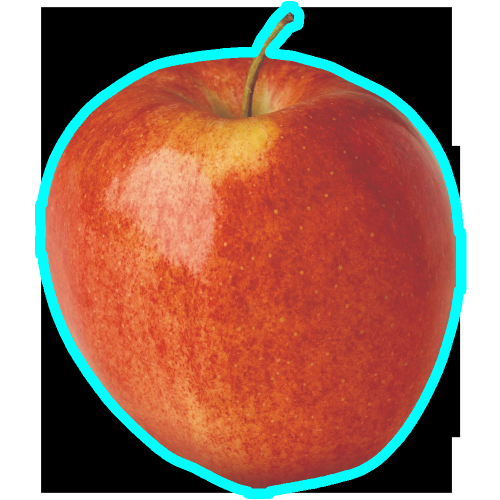

True

In [9]:
con_image = cv2.drawContours(image_2, [c2], -1, (0, 255, 255), 20)

display_image = cv2.resize(con_image, (500, int(500 * con_image.shape[0] / con_image.shape[1])))
display(Image.fromarray(display_image))

cv2.imwrite(f'{out_path}/edge2.jpg', cv2.cvtColor(display_image, cv2.COLOR_BGR2RGB))

# Area of Image-2

In [10]:
area2 = cv2.contourArea(c2)
print(f'Area of the object in Image-2 is {area2} pixels')

Area of the object in Image-2 is 585321.5 pixels


# Ratio of Areas

In [11]:
ratio = area1 / area2
print(f'Ratio of the two areas is {ratio}')

Ratio of the two areas is 3.3783732529900234


# Farthest Points of Image-1

In [12]:
c1 = np.squeeze(c1)

maxx1 = 0
pt_a1 = None
pt_b1 = None

for a in c1:
    for b in c1:
        distance = dist.euclidean(tuple(a), tuple(b))
        if distance > maxx1:
            maxx1 = distance
            pt_a1 = tuple(a)
            pt_b1 = tuple(b)

print(f'Two farthest points of the edge are {pt_a1} and {pt_b1} and the distance between them is {maxx1}')

Two farthest points of the edge are (582, 515) and (2304, 1709) and the distance between them is 2095.4522184960456


In [13]:
c2 = np.squeeze(c2)

maxx2 = 0
pt_a2 = None
pt_b2 = None

for a in c2:
    for b in c2:
        distance = dist.euclidean(tuple(a), tuple(b))
        if distance > maxx2:
            maxx2 = distance
            pt_a2 = tuple(a)
            pt_b2 = tuple(b)

print(f'Two farthest points of the edge are {pt_a2} and {pt_b2} and the distance between them is {maxx2}')

Two farthest points of the edge are (496, 987) and (587, 12) and the distance between them is 979.2374584338571


# Ratio of the two distances

In [14]:
ratio = maxx1 / maxx2
print(f'Ratio of the two maximum distances is {ratio}')

Ratio of the two maximum distances is 2.1398815991449163
